(64, 224, 224)
(64, 2)
(16, 224, 224)
(16, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 

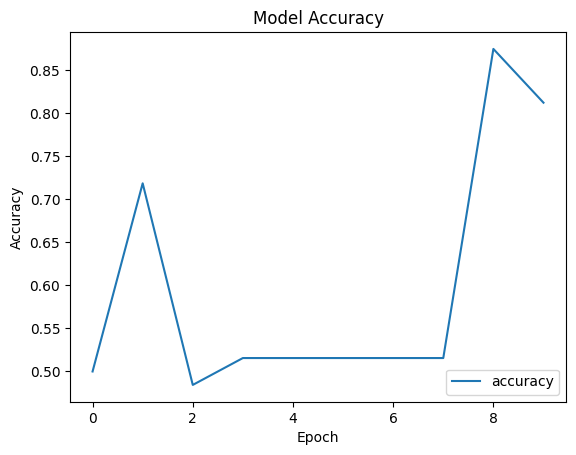

1/1 [==============================] - 1s 505ms/step


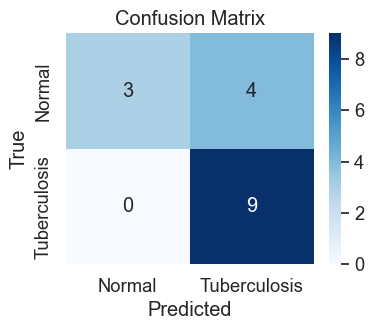

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.69      1.00      0.82         9

    accuracy                           0.75        16
   macro avg       0.85      0.71      0.71        16
weighted avg       0.83      0.75      0.72        16



In [2]:
import os
import pandas as pd
import random as rd
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#defining paths to your data
DATA2_PATH = r"C:\Users\B.BASI REDDY\Documents\TB_Chest_Radiography_Database"
DATA2_TRAIN_NORMAL = os.path.join(DATA2_PATH, "Normal")
DATA2_TRAIN_TUBERCULOSIS = os.path.join(DATA2_PATH, "Tuberculosis")

# Load image file lists
normal_img = os.listdir(DATA2_TRAIN_NORMAL)
tuberculosis_img = os.listdir(DATA2_TRAIN_TUBERCULOSIS)


# Create dataframes with labels
df_normal = pd.DataFrame(normal_img, columns=["images"])
df_normal["labels"] = 0  # Label for normal
df_normal["images"] = DATA2_TRAIN_NORMAL + "/" + df_normal["images"]
df_tuberculosis = pd.DataFrame(tuberculosis_img, columns=["images"])
df_tuberculosis["labels"] = 1  # Label for tuberculosis
df_tuberculosis["images"] = DATA2_TRAIN_TUBERCULOSIS + "/" + df_tuberculosis["images"]

# Concatenate dataframes
data_df = pd.concat([df_normal, df_tuberculosis], ignore_index=True)
data_df = data_df.sample(frac=1, random_state=42).reset_index(drop=True)

image_size = (224, 224)
X = []
for img_path in data_df["images"]:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:  # Check if the image was loaded successfully
        img = cv2.resize(img, image_size)
        X.append(img)

X = np.array(X)
X = X / 255.0  # Normalize images
Y = data_df["labels"]

if len(X) > len(Y):
    X = X[:len(Y)]
elif len(Y) > len(X):
    Y = Y[:len(X)] 
Y = keras.utils.to_categorical(Y, num_classes=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

#training the model
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),batch_size=64) 

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()

Y_pred = model.predict(X_test)
Y_pred=(Y_pred>0.5)
Y_true = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

# Calculate and plot the confusion matrix
confusion = confusion_matrix(Y_true, Y_pred)
class_labels = ['Normal', 'Tuberculosis']

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(Y_true,Y_pred, zero_division=1)
f1 = f1_score(Y_true, Y_pred, zero_division=1)
print("Classification Report:")
print(classification_report(Y_true,Y_pred))









In [1]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'plt' is not defined